In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import multitest

# Why do I always fucking forget how to do this. There should be a global default.
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)

#200 generations ; 4 array or matrix ; alpha 2000 or 7000 ; m 0.001 or 0.01 ; s 0.001 or 0.01
# J 1000; point_mutation; all defaults otherwise
# ecological strength 1
# Testing array VS non array
cont_pw = pd.read_csv("../../speedtest_cont/cont/pw_SIMOUT.txt", sep="\t", header=0)
print(cont_pw.shape)
cont_filt = pd.read_csv("../../speedtest_cont/cont/filt_SIMOUT.txt", sep="\t", header=0)
cont_neutral = pd.read_csv("../../speedtest_cont/cont/neutral_SIMOUT.txt", sep="\t", header=0)

nocont_pw = pd.read_csv("../../speedtest_cont/no_cont/nocont_pw_SIMOUT.txt", sep="\t", header=0)
nocont_neutral = pd.read_csv("../../speedtest_cont/no_cont/nocont_neutral_SIMOUT.txt", sep="\t", header=0)
nocont_filt = pd.read_csv("../../speedtest_cont/no_cont/nocont_filt_SIMOUT.txt", sep="\t", header=0)

noarr_pw = pd.read_csv("../../array_noarray/noarray_pw/SIMOUT.txt", sep="\t", header=0)
arr_pw = pd.read_csv("../../array_noarray/array_pw/SIMOUT.txt", sep="\t", header=0)

noarr_neutral = pd.read_csv("../../array_noarray/noarray_neutral/SIMOUT.txt", sep="\t", header=0)
noarr_filt = pd.read_csv("../../array_noarray/noarray_filtering/SIMOUT.txt", sep="\t", header=0)

noseed = pd.read_csv("../../speedtest_cont/noseed/SIMOUT.txt", sep="\t", header=0)
noseed2 = pd.read_csv("../../speedtest_cont/noseed2/SIMOUT.txt", sep="\t", header=0)
mut = pd.read_csv("../../speedtest_cont/mut/SIMOUT.txt", sep='\t', header=0)
cont2 = pd.read_csv("../../speedtest_cont/simplified_code/SIMOUT.txt", sep="\t", header=0)

print(cont_pw.shape, cont_filt.shape, cont_neutral.shape)
print(nocont_pw.shape, nocont_neutral.shape, nocont_filt.shape)
print(nocont_pw.columns[27])
print(cont_pw.columns[27])
print(noarr_pw.columns[21])
print(noseed.columns[26])
print(mut.columns[24])
print(cont_pw.shape)
print(nocont_pw.shape)
print(cont2.columns[25])

(160, 87)
(160, 87) (160, 87) (160, 87)
(160, 87) (160, 87) (160, 87)
S
S
S
S
S
(160, 87)
(160, 87)
S


In [2]:
print(cont_pw.shape, nocont_pw.shape)
display(cont_pw)

(160, 87) (160, 87)


,seed,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,intrasp_competition_a,intrasp_competition_b,intersp_competition_a,intersp_competition_b,mutualism_proportion,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,972389669,100,750000,2.0,0.7,2.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,200,[0. 1.],point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,1.000,0.01008,0.01138,0.58824,-0.73204,70.0,38.66968,28.28374,23.15114,20.04107,20.28860,17.95628,16.07678,14.65219,0.00026,0.00044,1.87729,3.38027,0.00000,0.00035,0.00431,0.00311,1.09677,1.55290,0.00360,0.00386,0.0,37.28853,27.17966,22.61554,20.10469,-0.45637,3.92868,-0.08520,-1.20261,-0.08016,6.26305,-0.41226,3.37345,-0.20868,-0.97839,0.10407,5.40616,0.04412,-0.55523,-0.12348,0.22422,0.18422,-0.85689,0.17756,0.27611,0.00028,-0.01424,0.19894,0.05441,47.0,6.0,0.0,7.0,2.0,5.0,1.0,0.0,0.0,2.0
1,972389669,100,750000,2.0,0.7,2.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,200,[0. 1.],point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,1.000,0.01024,0.01082,0.58824,4.51707,77.0,43.97546,31.21683,24.89103,21.14499,17.59217,15.29421,13.30580,11.76334,0.00017,0.00034,2.51544,7.67208,0.00000,0.00035,0.00739,0.00958,2.83929,6.91620,0.00526,0.00298,0.0,41.15184,29.60269,24.51739,21.78180,-0.29051,5.36557,0.17519,-1.09020,-0.80970,9.31851,-0.00721,4.80958,0.09457,-1.24650,-0.29203,8.85564,0.28330,-0.55599,-0.08063,-0.15630,0.51766,-0.46287,-0.00572,0.33536,-0.06762,0.20895,0.01879,-0.18286,57.0,8.0,0.0,5.0,5.0,1.0,0.0,0.0,0.0,1.0
2,972389669,100,750000,2.0,0.7,2.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,200,[0. 1.],point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,1.000,0.01012,0.01086,0.58824,-1.06714,68.0,40.06273,30.74842,26.63001,24.29593,18.04273,15.60640,13.78978,12.49810,0.00022,0.00041,2.15323,4.71373,0.00000,0.00035,0.00604,0.00431,0.99393,0.63679,0.00526,0.00430,0.0,37.15943,29.24145,25.73162,23.70411,-1.70734,5.07710,0.16822,-0.78553,-1.66259,6.56938,-1.36257,4.62092,0.08388,-0.89640,-1.51660,7.07025,0.34477,-0.45618,-0.08434,-0.11087,0.14599,0.50087,0.09037,-0.09096,0.13782,0.03782,-0.06028,-0.07626,47.0,8.0,0.0,5.0,6.0,0.0,0.0,0.0,1.0,1.0
3,972389669,100,750000,2.0,0.7,2.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,200,[0. 1.],point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,1.000,0.01054,0.01142,0.58824,-2.89039,69.0,40.59707,31.81471,27.66379,24.98040,20.41001,17.86224,15.59003,13.78236,0.00021,0.00036,2.06438,5.21155,0.00000,0.00035,0.00406,0.00412,3.15650,13.11817,0.00263,0.00298,0.0,39.54436,30.96253,27.05405,24.75512,3.65582,5.43402,-0.34711,-0.88952,4.69790,7.74045,2.69124,4.49095,-0.09175,-0.94284,3.35866,7.10990,-0.96458,-0.94307,0.25536,-0.05331,-1.33923,-0.63054,0.29792,0.09091,0.19040,-0.14525,0.01609,-0.05808,46.0,9.0,0.0,8.0,2.0,3.0,0.0,0.0,0.0,1.0
4,972389669,100,750000,2.0,0.7,2.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,200,[0. 1.],point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,1.000,0.00949,0.01182,0.58824,1.04457,70.0,43.41692,34.08084,29.52191,26.74770,7.44817,6.20910,5.37713,4.85277,0.00009,0.00030,4.18003,19.62588,0.00000,0.00000,0.00675,0.01073,2.15221,2.98608,

In [3]:
print("arr noarr")
ttvals_pw, ttres_pw = stats.ttest_ind(noarr_pw.iloc[:, 21:], cont2.iloc[:, 25:])
print(ttres_pw[ttres_pw<0.05])
ttres_pw = multitest.multipletests(ttres_pw,method='bonferroni')
display(ttres_pw[1])
# NO DIFF
        
print("arr mut")
ttvals_pw, ttres_pw = stats.ttest_ind(arr_pw.iloc[:, 21:], mut.iloc[:, 24:])
print(ttres_pw[ttres_pw<0.05])
ttres_pw = multitest.multipletests(ttres_pw,method='bonferroni')
display(ttres_pw[1])
# NO DIFF

print("mut no seed")    
ttvals_pw, ttres_pw = stats.ttest_ind(mut.iloc[:, 24:], noseed2.iloc[:, 26:])
print(ttres_pw[ttres_pw<0.05])
ttres_pw = multitest.multipletests(ttres_pw,method='bonferroni')
display(ttres_pw[1])
# BIG DIFF

print("mut cont2")    
ttvals_pw, ttres_pw = stats.ttest_ind(mut.iloc[:, 24:], cont2.iloc[:, 25:])
print(ttres_pw[ttres_pw<0.05])
ttres_pw = multitest.multipletests(ttres_pw,method='bonferroni')
display(ttres_pw[1])
# BIG DIFF

print("array noseed")
ttvals_pw, ttres_pw = stats.ttest_ind(arr_pw.iloc[:, 21:], noseed2.iloc[:, 26:])
print(ttres_pw[ttres_pw<0.05])
ttres_pw = multitest.multipletests(ttres_pw,method='bonferroni')
display(ttres_pw[1])
# BIG DIFF
        
print("noseed no cont")
ttvals_pw, ttres_pw = stats.ttest_ind(noseed2.iloc[:, 26:], nocont_pw.iloc[:, 27:])
print(ttres_pw[ttres_pw<0.05])
ttres_pw = multitest.multipletests(ttres_pw,method='bonferroni')
display(ttres_pw[1])
# BIG DIFF


print("nocont cont")      
ttvals_pw, ttres_pw = stats.ttest_ind(nocont_pw.iloc[:, 27:], cont_pw.iloc[:, 27:])
print(ttres_pw[ttres_pw<0.05])
ttres_pw = multitest.multipletests(ttres_pw,method='bonferroni')
display(ttres_pw[1])
# ~ DIFF ?


print("cont cont2")      
ttvals_pw, ttres_pw = stats.ttest_ind(cont2.iloc[:, 25:], cont_pw.iloc[:, 27:])
print(ttres_pw[ttres_pw<0.05])
ttres_pw = multitest.multipletests(ttres_pw,method='bonferroni')
display(ttres_pw[1])
# ~ DIFF ?

print("nocont cont2")      
ttvals_pw, ttres_pw = stats.ttest_ind(nocont_pw.iloc[:, 27:], cont2.iloc[:, 25:])
print(ttres_pw[ttres_pw<0.05])
ttres_pw = multitest.multipletests(ttres_pw,method='bonferroni')
display(ttres_pw[1])
# ~ DIFF ?





arr noarr
[0.03654301 0.02159824 0.01681038 0.03892978 0.0419041  0.02742033
 0.02218409 0.01032318 0.04574002 0.02313553 0.01760096 0.03962959]


/home/juliette/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/juliette/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/juliette/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
<ipython-input-3-06a30c9bf9ed>:3: RuntimeWarning: invalid value encountered in less
  print(ttres_pw[ttres_pw<0.05])
/home/juliette/.local/lib/python3.8/site-packages/statsmodels/stats/multitest.py:152: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
/home/juliette/.local/lib/python3.8/site-packages/statsmodels/stats/multitest.py:256: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ,        nan, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.61939084,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

arr mut
[0.03314432 0.02269604 0.00570141]


<ipython-input-3-06a30c9bf9ed>:10: RuntimeWarning: invalid value encountered in less
  print(ttres_pw[ttres_pw<0.05])


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ,        nan, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.34208469, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

mut no seed
[1.74055061e-05 6.54384845e-05 1.45169094e-04 2.29399430e-04
 3.01100212e-04 2.13822912e-05 2.93365983e-05 2.10395916e-09
 9.47143181e-10 4.12499205e-04 2.40253992e-06 1.28323214e-04
 2.89786893e-04 5.00869942e-04 7.10851298e-04 2.13625608e-02
 2.62640181e-02 4.21013887e-03 4.62654503e-02 1.57704322e-08]


<ipython-input-3-06a30c9bf9ed>:17: RuntimeWarning: invalid value encountered in less
  print(ttres_pw[ttres_pw<0.05])


array([1.04433037e-03, 3.92630907e-03, 8.71014565e-03, 1.37639658e-02,
       1.80660127e-02, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.28293747e-03, 1.76019590e-03, 1.26237550e-07,
       5.68285909e-08, 2.47499523e-02, 1.44152395e-04, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00,            nan, 7.69939286e-03, 1.73872136e-02,
       3.00521965e-02, 4.26510779e-02, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.52608332e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.46225931e-07, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

mut cont2
[0.04039565 0.01004307 0.02736248 0.03078553 0.02065909]


<ipython-input-3-06a30c9bf9ed>:24: RuntimeWarning: invalid value encountered in less
  print(ttres_pw[ttres_pw<0.05])


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ,        nan, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.60258403,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

array noseed
[3.40345740e-05 5.02843011e-04 2.61452973e-03 6.29084978e-03
 1.01481736e-02 1.66552227e-05 8.87861339e-06 3.12335108e-06
 2.62067535e-05 2.41391170e-04 2.08505064e-06 8.03198910e-04
 3.86640360e-03 8.82157765e-03 1.36105427e-02 1.30061467e-02
 8.35952534e-03 1.46977109e-02 4.47070815e-02 4.17079298e-02
 1.42374811e-02 3.00514768e-02 1.35140891e-07]


<ipython-input-3-06a30c9bf9ed>:31: RuntimeWarning: invalid value encountered in less
  print(ttres_pw[ttres_pw<0.05])


array([2.04207444e-03, 3.01705807e-02, 1.56871784e-01, 3.77450987e-01,
       6.08890414e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 9.99313362e-04, 5.32716803e-04, 1.87401065e-04,
       1.57240521e-03, 1.44834702e-02, 1.25103038e-04, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00,            nan, 4.81919346e-02, 2.31984216e-01,
       5.29294659e-01, 8.16632562e-01, 1.00000000e+00, 7.80368805e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 5.01571520e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 8.81862652e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 8.54248868e-01,
       1.00000000e+00, 1.00000000e+00, 8.10845348e-06, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

noseed no cont
[2.33384396e-05 2.48004771e-05 4.93469463e-05 8.99910206e-05
 1.33054421e-04 6.23379806e-05 3.11482470e-05 1.13721991e-04
 3.65783861e-03 1.97138133e-03 6.08872269e-06 5.24328578e-05
 1.02884278e-04 1.85574912e-04 2.68181806e-04 7.07757137e-03
 1.06395092e-02 2.19452082e-02 4.39006712e-02 8.76808509e-04
 1.92542012e-02 3.16942366e-07]


<ipython-input-3-06a30c9bf9ed>:38: RuntimeWarning: invalid value encountered in less
  print(ttres_pw[ttres_pw<0.05])


array([1.40030637e-03, 1.48802862e-03, 2.96081678e-03, 5.39946124e-03,
       7.98326527e-03, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 3.74027883e-03, 1.86889482e-03, 6.82331943e-03,
       2.19470317e-01, 1.18282880e-01, 3.65323361e-04, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00,            nan, 3.14597147e-03, 6.17305668e-03,
       1.11344947e-02, 1.60909084e-02, 1.00000000e+00, 4.24654282e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 6.38370551e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 5.26085105e-02, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.90165420e-05, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

nocont cont
[0.04578652]


<ipython-input-3-06a30c9bf9ed>:46: RuntimeWarning: invalid value encountered in less
  print(ttres_pw[ttres_pw<0.05])


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

cont cont2
[0.01064799 0.00156798 0.0047954  0.00076639 0.00700116]


<ipython-input-3-06a30c9bf9ed>:54: RuntimeWarning: invalid value encountered in less
  print(ttres_pw[ttres_pw<0.05])


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ,        nan, 1.        , 1.        , 1.        ,
       1.        , 0.63887937, 1.        , 1.        , 1.        ,
       0.09407905, 1.        , 0.28772416, 1.        , 1.        ,
       1.        , 0.04598357, 1.        , 1.        , 1.        ,
       1.        , 0.42006978, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

nocont cont2
[0.04172641 0.01725922 0.03507594 0.01602033 0.01088043 0.01496913
 0.01140128 0.0058131 ]


<ipython-input-3-06a30c9bf9ed>:61: RuntimeWarning: invalid value encountered in less
  print(ttres_pw[ttres_pw<0.05])


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ,        nan, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.96122006, 1.        , 0.65282609, 1.        , 1.        ,
       1.        , 0.89814799, 1.        , 1.        , 1.        ,
       1.        , 0.68407698, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.34878574, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [10]:
display(noarr_pw, nocont_pw)

,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,100,750000,2.0,0.7,2.0,1.0,200,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,1.000,0.01032,0.01093,0.58824,0.21717,73.0,42.44892,32.92289,28.20375,25.20769,19.27195,17.00455,15.28827,14.04700,0.00021,0.00038,1.99491,3.63161,0.00000,0.00035,0.00697,0.00525,0.93252,0.31135,0.00596,0.00632,0.0,38.98403,30.71986,26.75508,24.27408,4.05647,5.26622,-0.11625,-0.98093,4.23951,8.97267,3.56739,4.83873,0.12041,-0.85435,3.30896,7.29760,-0.48908,-0.42749,0.23665,0.12658,-0.93055,-1.67507,-0.04552,0.04874,0.09872,0.34662,-0.06368,-0.31653,51.0,0.0,8.0,5.0,2.0,4.0,0.0,1.0,0.0,2.0
1,100,750000,2.0,0.7,2.0,1.0,200,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,1.000,0.01058,0.01112,0.58824,-0.53339,74.0,44.13718,33.77922,28.73124,25.68974,10.67587,8.03370,6.78072,6.15525,0.00020,0.00058,3.97234,16.48129,0.00000,0.00000,0.00647,0.00485,0.18693,-1.38195,0.00491,0.00961,0.0,41.85018,32.30169,27.70541,24.96988,-1.85460,5.49022,-0.01000,-0.94985,-2.26047,8.41291,-1.39826,4.27349,-0.11592,-0.61602,-1.47118,6.27031,0.45634,-1.21673,-0.10592,0.33384,0.78929,-2.14260,0.17560,0.11397,0.09700,0.06640,0.52249,0.02567,59.0,9.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,100,750000,2.0,0.7,2.0,1.0,200,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,1.000,0.01008,0.01070,0.58824,-0.13214,71.0,43.39356,33.87075,29.54564,27.10094,17.71614,15.49636,13.96825,12.85752,0.00028,0.00052,2.07880,3.97884,0.00000,0.00035,0.00588,0.00636,3.15722,10.75450,0.00456,0.00439,0.0,41.60863,33.05456,29.15879,26.94621,0.39922,4.90854,0.26301,-0.90399,-0.07282,6.96134,-0.29217,3.69343,0.32515,-0.50559,-0.72423,5.62123,-0.69139,-1.21511,0.06213,0.39840,-0.65141,-1.34011,0.22272,0.07031,0.18305,0.11862,-0.07284,0.01196,50.0,7.0,1.0,6.0,0.0,4.0,1.0,1.0,0.0,1.0
3,100,750000,2.0,0.7,2.0,1.0,200,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,1.000,0.01020,0.01113,0.58824,-1.28846,70.0,41.52898,33.76325,30.37755,28.38334,14.32255,13.01378,12.04491,11.34846,0.00022,0.00046,2.14310,3.72021,0.00000,0.00000,0.00451,0.00361,0.39347,-0.70583,0.00439,0.00583,0.0,41.51799,34.07591,30.86118,28.97407,-1.90336,4.82950,-0.02818,-1.16498,-1.98615,8.09105,-1.84016,4.18077,0.07456,-1.13205,-1.99661,7.13534,0.06320,-0.64874,0.10274,0.03293,-0.01046,-0.95571,0.36749,0.20616,0.08019,0.22440,0.16116,0.00167,54.0,2.0,0.0,4.0,2.0,4.0,0.0,0.0,2.0,2.0
4,100,750000,2.0,0.7,2.0,1.0,200,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,0.987,0.01015,0.01029,0.58824,-0.56995,69.0,43.09946,33.40460,28.03209,24.41444,18.11323,15.68156,13.81327,12.43776,0.00021,0.00039,2.19344,5.15940,0.00000,0.00035,0.00859,0.00736,0.74542,-0.85820,0.00561,0.00930,0.0,41.01928,32.40965,28.02607,25.32790,0.28071,4.51739,0.01239,-1.01139,0.37913,7.33861,-0.01282,4.16336,0.02113,-1.05241,-0.14681,6.83200,-0.29353,-0.35403,0.00874,-0.04102,-0.52594,-0.50661,0.15121,0.2

,seed,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,intrasp_competition_a,intrasp_competition_b,intersp_competition_a,intersp_competition_b,mutualism_proportion,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,696424205,100,750000,2.0,0.7,2.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,200,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,1.000,0.00994,0.01156,0.58824,-0.85219,71.0,37.72170,28.12307,24.15896,21.95071,13.85361,12.23640,11.05401,10.17339,0.00017,0.00038,2.45609,5.96321,0.00000,0.00000,0.00859,0.00547,0.28577,-0.92174,0.00789,0.00921,0.0,35.95087,26.96624,23.40967,21.44190,-1.22481,5.94611,-0.26620,-1.05534,-0.48430,9.16830,-1.35004,4.67340,-0.17230,-0.78938,-1.13996,7.03957,-0.12523,-1.27271,0.09390,0.26596,-0.65567,-2.12873,0.04438,0.18524,-0.06493,-0.02801,0.53371,-0.10857,55.0,6.0,0.0,2.0,2.0,4.0,1.0,0.0,0.0,1.0
1,696424205,100,750000,2.0,0.7,2.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,200,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,1.000,0.01017,0.01111,0.58824,2.20744,74.0,44.40029,35.01155,30.70094,28.13896,18.57998,14.40944,11.76417,10.19353,0.00030,0.00061,3.11072,11.74173,0.00000,0.00035,0.00559,0.00500,1.07911,2.73021,0.00737,0.00768,0.0,44.41145,34.92227,30.63091,28.14216,1.33260,6.26941,-0.14600,-1.29734,2.18546,10.95852,0.43197,4.67495,0.12313,-0.99789,-0.32046,7.62420,-0.90063,-1.59445,0.26913,0.29945,-2.50592,-3.33432,0.18304,0.16234,-0.05418,0.27849,-0.00188,-0.11921,58.0,5.0,7.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0
2,696424205,100,750000,2.0,0.7,2.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,200,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,1.000,0.00978,0.01071,0.58824,-5.65299,69.0,41.54925,31.50797,26.83350,24.23062,19.93767,17.44268,15.60608,14.32896,0.00030,0.00052,1.90503,3.20394,0.00000,0.00062,0.00593,0.00432,0.32627,-1.02117,0.00649,0.00737,0.0,39.32223,30.42466,26.27874,23.95167,-3.50029,4.77236,-0.04950,-1.04945,-3.22149,7.44381,-2.71021,4.20842,-0.02053,-0.92374,-2.41932,6.29674,0.79008,-0.56395,0.02896,0.12571,0.80217,-1.14707,0.11781,0.26398,0.21463,0.24021,0.43829,-0.04394,46.0,4.0,7.0,3.0,4.0,1.0,0.0,1.0,2.0,1.0
3,696424205,100,750000,2.0,0.7,2.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,200,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,1.000,0.01014,0.01135,0.58824,-1.86963,78.0,50.35083,40.62729,35.93748,33.07542,16.84329,14.97787,13.57953,12.60299,0.00014,0.00029,2.24419,4.53125,0.00000,0.00000,0.00941,0.00599,-0.00844,-1.27218,0.01158,0.01136,0.0,49.50899,40.42335,35.97622,33.26276,-1.23129,6.49023,-0.07271,-0.88855,-0.88205,9.86525,-1.21474,5.65769,-0.10211,-0.90415,-0.83690,8.14944,0.01656,-0.83254,-0.02940,-0.01560,0.04515,-1.71581,0.14021,0.28461,0.22712,-0.13814,0.25932,0.05338,59.0,0.0,10.0,0.0,0.0,5.0,1.0,0.0,0.0,3.0
4,696424205,100,750000,2.0,0.7,2.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,200,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,1.000,0.01034,0.01120,0.58824,1.21782,80.0,44.16870,34.45899,30.28513,27.71999,11.80250,10.16739,9.05495,8.30666,0.000

In [4]:
# Compute pvalues for differences in summary statistics
# With Bonferroni correction for multiple testing
ttvals_pw, ttres_pw = stats.ttest_ind(nocont_pw.iloc[:, 27:], cont_pw.iloc[:, 27:])
print(ttres_pw[ttres_pw<0.05])
for i,val in enumerate(ttres_pw[1:]):
    if val<0.05:
        print(i, val, nocont_neutral.columns[21+i])
ttres_pw = multitest.multipletests(ttres_pw,method='bonferroni')


ttvals_neutral, ttres_neutral = stats.ttest_ind(nocont_neutral.iloc[:, 27:], cont_neutral.iloc[:, 27:])
print(ttres_neutral[ttres_neutral<0.05])
for i,val in enumerate(ttres_neutral[1:]):
    if val<0.05:
        print(i, val, nocont_neutral.columns[21+i])
ttres_neutral = multitest.multipletests(ttres_neutral,method='bonferroni')

ttvals_filt, ttres_filt = stats.ttest_ind(nocont_filt.iloc[:, 27:], cont_filt.iloc[:, 27:])
print(ttres_filt[ttres_filt<0.05])
ttres_filt = multitest.multipletests(ttres_filt,method='bonferroni')

[0.04578652]
44 0.04578652290606281 reg_loc_mean_trait_dif
[0.02180182]
47 0.021801819362678318 reg_loc_kurtosis_trait_dif
[0.02835865 0.00552819 0.02686453 0.01322883]


<ipython-input-4-62228e29a84e>:4: RuntimeWarning: invalid value encountered in less
  print(ttres_pw[ttres_pw<0.05])
<ipython-input-4-62228e29a84e>:12: RuntimeWarning: invalid value encountered in less
  print(ttres_neutral[ttres_neutral<0.05])
<ipython-input-4-62228e29a84e>:19: RuntimeWarning: invalid value encountered in less
  print(ttres_filt[ttres_filt<0.05])


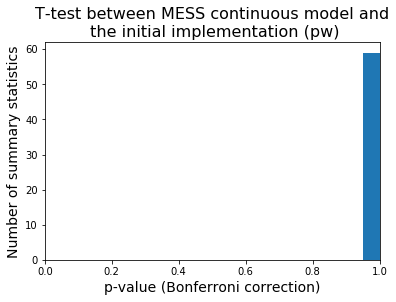

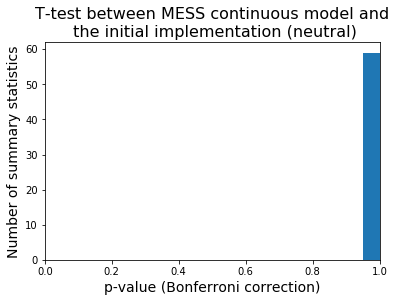

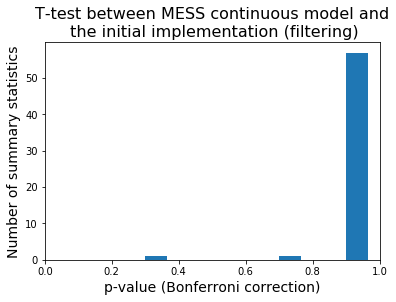

In [7]:
plt.hist(ttres_pw[1], align='left')
plt.xlabel("p-value (Bonferroni correction)",size=14)
plt.xlim(0,1)
plt.ylabel("Number of summary statistics",size=14)
plt.title("T-test between MESS continuous model and\n the initial implementation (pw)",size=16)
plt.savefig('../../data_pics/ttest_continuous_pw.png')
plt.show()
plt.close()


plt.hist(ttres_neutral[1], align='left')
plt.xlabel("p-value (Bonferroni correction)",size=14)
plt.xlim(0,1)
plt.ylabel("Number of summary statistics",size=14)
plt.title("T-test between MESS continuous model and\n the initial implementation (neutral)",size=16)
plt.savefig('../../data_pics/ttest_continuous_neutral.png')
plt.show()
plt.close()

plt.hist(ttres_filt[1], align='left')
plt.xlabel("p-value (Bonferroni correction)",size=14)
plt.xlim(0,1)
plt.ylabel("Number of summary statistics",size=14)
plt.title("T-test between MESS continuous model and\n the initial implementation (filtering)",size=16)
plt.savefig('../../data_pics/ttest_continuous_filt.png')
plt.show()
plt.close()

In [7]:
# Compute pvalues for differences in summary statistics
# With Bonferroni correction for multiple testing
ttvals_pw, ttres_pw = stats.ttest_ind(nocont_pw.iloc[:, 27:], noarr_pw.iloc[:, 21:])
print(ttres_pw[ttres_pw<0.05])
for i,val in enumerate(ttres_pw[1:]):
    if val<0.05:
        print(i, val, nocont_neutral.columns[21+i])
ttres_pw = multitest.multipletests(ttres_pw,method='bonferroni')


ttvals_neutral, ttres_neutral = stats.ttest_ind(nocont_neutral.iloc[:, 27:], noarr_neutral.iloc[:, 21:])
print(ttres_neutral[ttres_neutral<0.05])
for i,val in enumerate(ttres_neutral[1:]):
    if val<0.05:
        print(i, val, nocont_neutral.columns[21+i])
ttres_neutral = multitest.multipletests(ttres_neutral,method='bonferroni')

ttvals_filt, ttres_filt = stats.ttest_ind(nocont_filt.iloc[:, 27:], noarr_filt.iloc[:, 21:])
print(ttres_filt[ttres_filt<0.05])
ttres_filt = multitest.multipletests(ttres_filt,method='bonferroni')

[0.00073326 0.00074622 0.00299275 0.01605247 0.02106311 0.0048023 ]
25 0.0007332580011021252 median_dxys
29 0.00074621835717304 trait_h2
31 0.002992754438444101 trait_h4
35 0.016052467682457397 kurtosis_local_traits
37 0.02106311140107133 iqr_local_traits
41 0.004802296348788185 kurtosis_regional_traits
[0.04455543 0.04782265 0.03642112 0.02289199 0.02064094 0.02270689
 0.02137834 0.02306256]
13 0.04455542635727946 pi_h3
27 0.0478226494805213 trees
31 0.03642111883348157 trait_h4
33 0.022891992298735363 std_local_traits
34 0.020640935937688596 skewness_local_traits
35 0.022706888319418295 kurtosis_local_traits
36 0.021378335162631577 median_local_traits
47 0.023062557891938035 reg_loc_kurtosis_trait_dif
[0.02728556 0.04432339]


<ipython-input-7-81ce0a4112a4>:4: RuntimeWarning: invalid value encountered in less
  print(ttres_pw[ttres_pw<0.05])
<ipython-input-7-81ce0a4112a4>:12: RuntimeWarning: invalid value encountered in less
  print(ttres_neutral[ttres_neutral<0.05])
<ipython-input-7-81ce0a4112a4>:19: RuntimeWarning: invalid value encountered in less
  print(ttres_filt[ttres_filt<0.05])


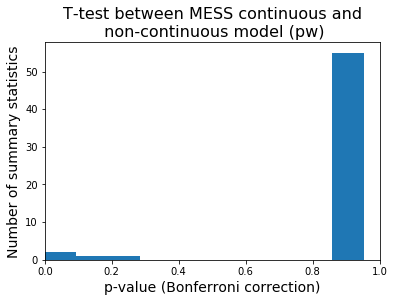

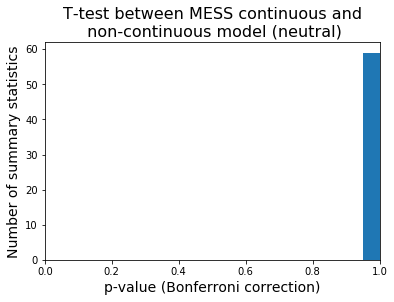

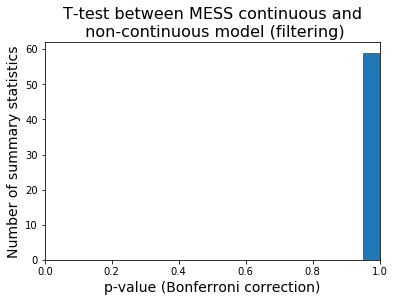

In [9]:
plt.hist(ttres_pw[1], align='left')
plt.xlabel("p-value (Bonferroni correction)",size=14)
plt.xlim(0,1)
plt.ylabel("Number of summary statistics",size=14)
plt.title("T-test between MESS continuous and\n non-continuous model (pw)",size=16)
plt.show()
plt.close()


plt.hist(ttres_neutral[1], align='left')
plt.xlabel("p-value (Bonferroni correction)",size=14)
plt.xlim(0,1)
plt.ylabel("Number of summary statistics",size=14)
plt.title("T-test between MESS continuous and\n non-continuous model (neutral)",size=16)
plt.show()
plt.close()

plt.hist(ttres_filt[1], align='left')
plt.xlabel("p-value (Bonferroni correction)",size=14)
plt.xlim(0,1)
plt.ylabel("Number of summary statistics",size=14)
plt.title("T-test between MESS continuous and\n non-continuous model (filtering)",size=16)
plt.show()
plt.close()

S S
[2.33384396e-05 2.48004771e-05 4.93469463e-05 8.99910206e-05
 1.33054421e-04 6.23379806e-05 3.11482470e-05 1.13721991e-04
 3.65783861e-03 1.97138133e-03 6.08872269e-06 5.24328578e-05
 1.02884278e-04 1.85574912e-04 2.68181806e-04 7.07757137e-03
 1.06395092e-02 2.19452082e-02 4.39006712e-02 8.76808509e-04
 1.92542012e-02 3.16942366e-07]
0 2.4800477078066603e-05 generation
1 4.9346946252505095e-05 _lambda
2 8.999102062276055e-05 migrate_calculated
3 0.00013305442111421266 extrate_calculated
8 6.233798057777636e-05 abund_h2
9 3.114824704137377e-05 abund_h3
10 0.00011372199051906634 abund_h4
11 0.0036578386135598614 pi_h1
12 0.0019713813315266403 pi_h2
13 6.0887226857743235e-06 pi_h3
21 5.243285784131811e-05 mean_dxys
22 0.0001028842779180133 std_dxys
23 0.00018557491227981916 skewness_dxys
24 0.00026818180602886126 kurtosis_dxys
26 0.0070775713727891125 iqr_dxys
32 0.010639509181784768 mean_local_traits
36 0.02194520823198158 median_local_traits
38 0.04390067115643235 mean_regional_tra

<ipython-input-39-260d3f78d0cf>:5: RuntimeWarning: invalid value encountered in less
  print(ttres_pw[ttres_pw<0.05])


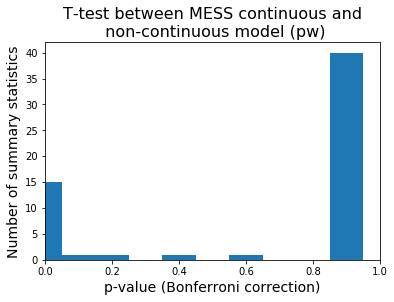

In [39]:
# Compute pvalues for differences in summary statistics
# With Bonferroni correction for multiple testing
print(nocont_pw.columns[27], noseed2.columns[26])
ttvals_pw, ttres_pw = stats.ttest_ind(nocont_pw.iloc[:, 27:], noseed2.iloc[:, 26:])
print(ttres_pw[ttres_pw<0.05])
for i,val in enumerate(ttres_pw[1:]):
    if val<0.05:
        print(i, val, nocont_neutral.columns[21+i])
ttres_pw = multitest.multipletests(ttres_pw,method='bonferroni')

plt.hist(ttres_pw[1], align='left')
plt.xlabel("p-value (Bonferroni correction)",size=14)
plt.xlim(0,1)
plt.ylabel("Number of summary statistics",size=14)
plt.title("T-test between MESS continuous and\n non-continuous model (pw)",size=16)
plt.show()
plt.close()

S S
[4.83494029e-079 1.32456122e-087 2.49653674e-094 1.25448464e-097
 2.83649206e-099 1.71001720e-095 1.61345555e-099 1.02061168e-101
 1.37807909e-102 9.66536117e-086 4.68449198e-069 1.74624643e-079
 2.17769503e-057 1.00468577e-093 9.10507653e-044 4.70282713e-028
 3.15043963e-060 5.98583933e-036 2.13635287e-046 3.79434605e-034
 6.06463219e-035 7.15487623e-084 2.35856575e-089 9.86532004e-092
 8.40429275e-093 2.43587829e-002 1.87564197e-125 1.86112053e-239
 1.80859094e-002 8.40348389e-114 3.97643352e-055 7.11623384e-034
 2.89927283e-068 3.50965813e-002 2.40186243e-096 8.28710548e-048
 2.87764046e-003 3.25361828e-057 4.19724740e-015 2.92719150e-057
 1.00486295e-025 3.40449529e-028 4.79663742e-005 5.64110536e-052
 2.52637102e-032 1.87176368e-045 2.24264281e-047 3.42999145e-026
 9.41866414e-019 3.13802231e-026 4.29237891e-023 7.92246549e-014
 8.87533613e-084]
0 1.3245612182182957e-87 generation
1 2.4965367435769707e-94 _lambda
2 1.2544846433358787e-97 migrate_calculated
3 2.836492061207866e

<ipython-input-32-4df684997d9e>:5: RuntimeWarning: invalid value encountered in less
  print(ttres_pw[ttres_pw<0.05])


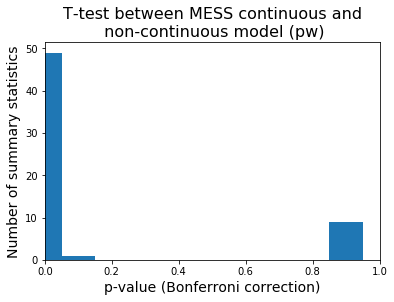

In [32]:
# Compute pvalues for differences in summary statistics
# With Bonferroni correction for multiple testing
print(noarr_pw.columns[21], noseed.columns[26])
ttvals_pw, ttres_pw = stats.ttest_ind(noarr_pw.iloc[:, 21:], noseed.iloc[:, 26:])
print(ttres_pw[ttres_pw<0.05])
for i,val in enumerate(ttres_pw[1:]):
    if val<0.05:
        print(i, val, nocont_neutral.columns[21+i])
ttres_pw = multitest.multipletests(ttres_pw,method='bonferroni')

plt.hist(ttres_pw[1], align='left')
plt.xlabel("p-value (Bonferroni correction)",size=14)
plt.xlim(0,1)
plt.ylabel("Number of summary statistics",size=14)
plt.title("T-test between MESS continuous and\n non-continuous model (pw)",size=16)
plt.show()
plt.close()

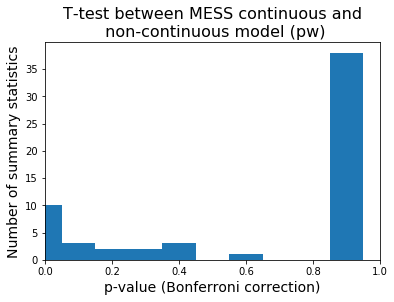

In [21]:
display(noseed)

,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,intrasp_competition_a,intrasp_competition_b,intersp_competition_a,intersp_competition_b,mutualism_proportion,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,100,750000,2.0,0.7,2.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,200,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,0.000,0.00978,0.01775,0.58824,-0.75306,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00097,0.0,0.0,-3.0,0.00097,0.0,0.02439,0.0,0.0,-3.0,0.02439,0.0,0.0,1.0,1.0,1.0,1.0,-1.97163,0.0,0.0,-3.0,-1.97163,0.0,-1.95262,1.03848,0.21991,9.66499,-1.95129,0.89441,0.01901,1.03848,0.21991,12.66499,0.02034,0.89441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,100,750000,2.0,0.7,2.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,200,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,0.001,0.00967,0.01768,0.58824,2.72848,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00187,0.0,0.0,-3.0,0.00187,0.0,0.01684,0.0,0.0,-3.0,0.01684,0.0,0.0,1.0,1.0,1.0,1.0,3.62401,0.0,0.0,-3.0,3.62401,0.0,3.31249,1.31630,-2.77234,10.81454,3.54613,0.97167,-0.31152,1.31630,-2.77234,13.81454,-0.07788,0.97167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,100,750000,2.0,0.7,2.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,200,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,0.000,0.00992,0.01786,0.58824,-1.84214,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00554,0.0,0.0,-3.0,0.00554,0.0,0.01667,0.0,0.0,-3.0,0.01667,0.0,0.0,1.0,1.0,1.0,1.0,-3.02778,0.0,0.0,-3.0,-3.02778,0.0,-3.21110,1.00033,-1.34184,7.14458,-3.07528,0.89536,-0.18332,1.00033,-1.34184,10.14458,-0.04750,0.89536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,100,750000,2.0,0.7,2.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,200,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,0.003,0.01006,0.01762,0.58824,1.54950,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00538,0.0,0.0,-3.0,0.00538,0.0,0.02386,0.0,0.0,-3.0,0.02386,0.0,0.0,1.0,1.0,1.0,1.0,0.20247,0.0,0.0,-3.0,0.20247,0.0,0.19174,0.85766,0.90798,11.69778,0.19077,0.82833,-0.01073,0.85766,0.90798,14.69778,-0.01169,0.82833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,100,750000,2.0,0.7,2.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,200,pairwise_competition,point_mutation,0.0,2000,570.0,1000.0,0.010,0.010,200.0,0.002,0.00961,0.01772,0.58824,1.33855,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00667,0.0,0.0,-3.0,0.00667,0.0,0.01930,0.0,0.0,-3.0,0.01930,0.0,0.0,1.0,1.0,1.0,1.0,-5.18915,0.0,0.0,-3.0,-5.18915,0.0,-4.78682,1.66671,3.12283,11.12973,-5.13948,0.91683,0.40233,1.66671,3.12283,14.12973,0.04967,0.91683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,100,750000,2.0,0.7,2

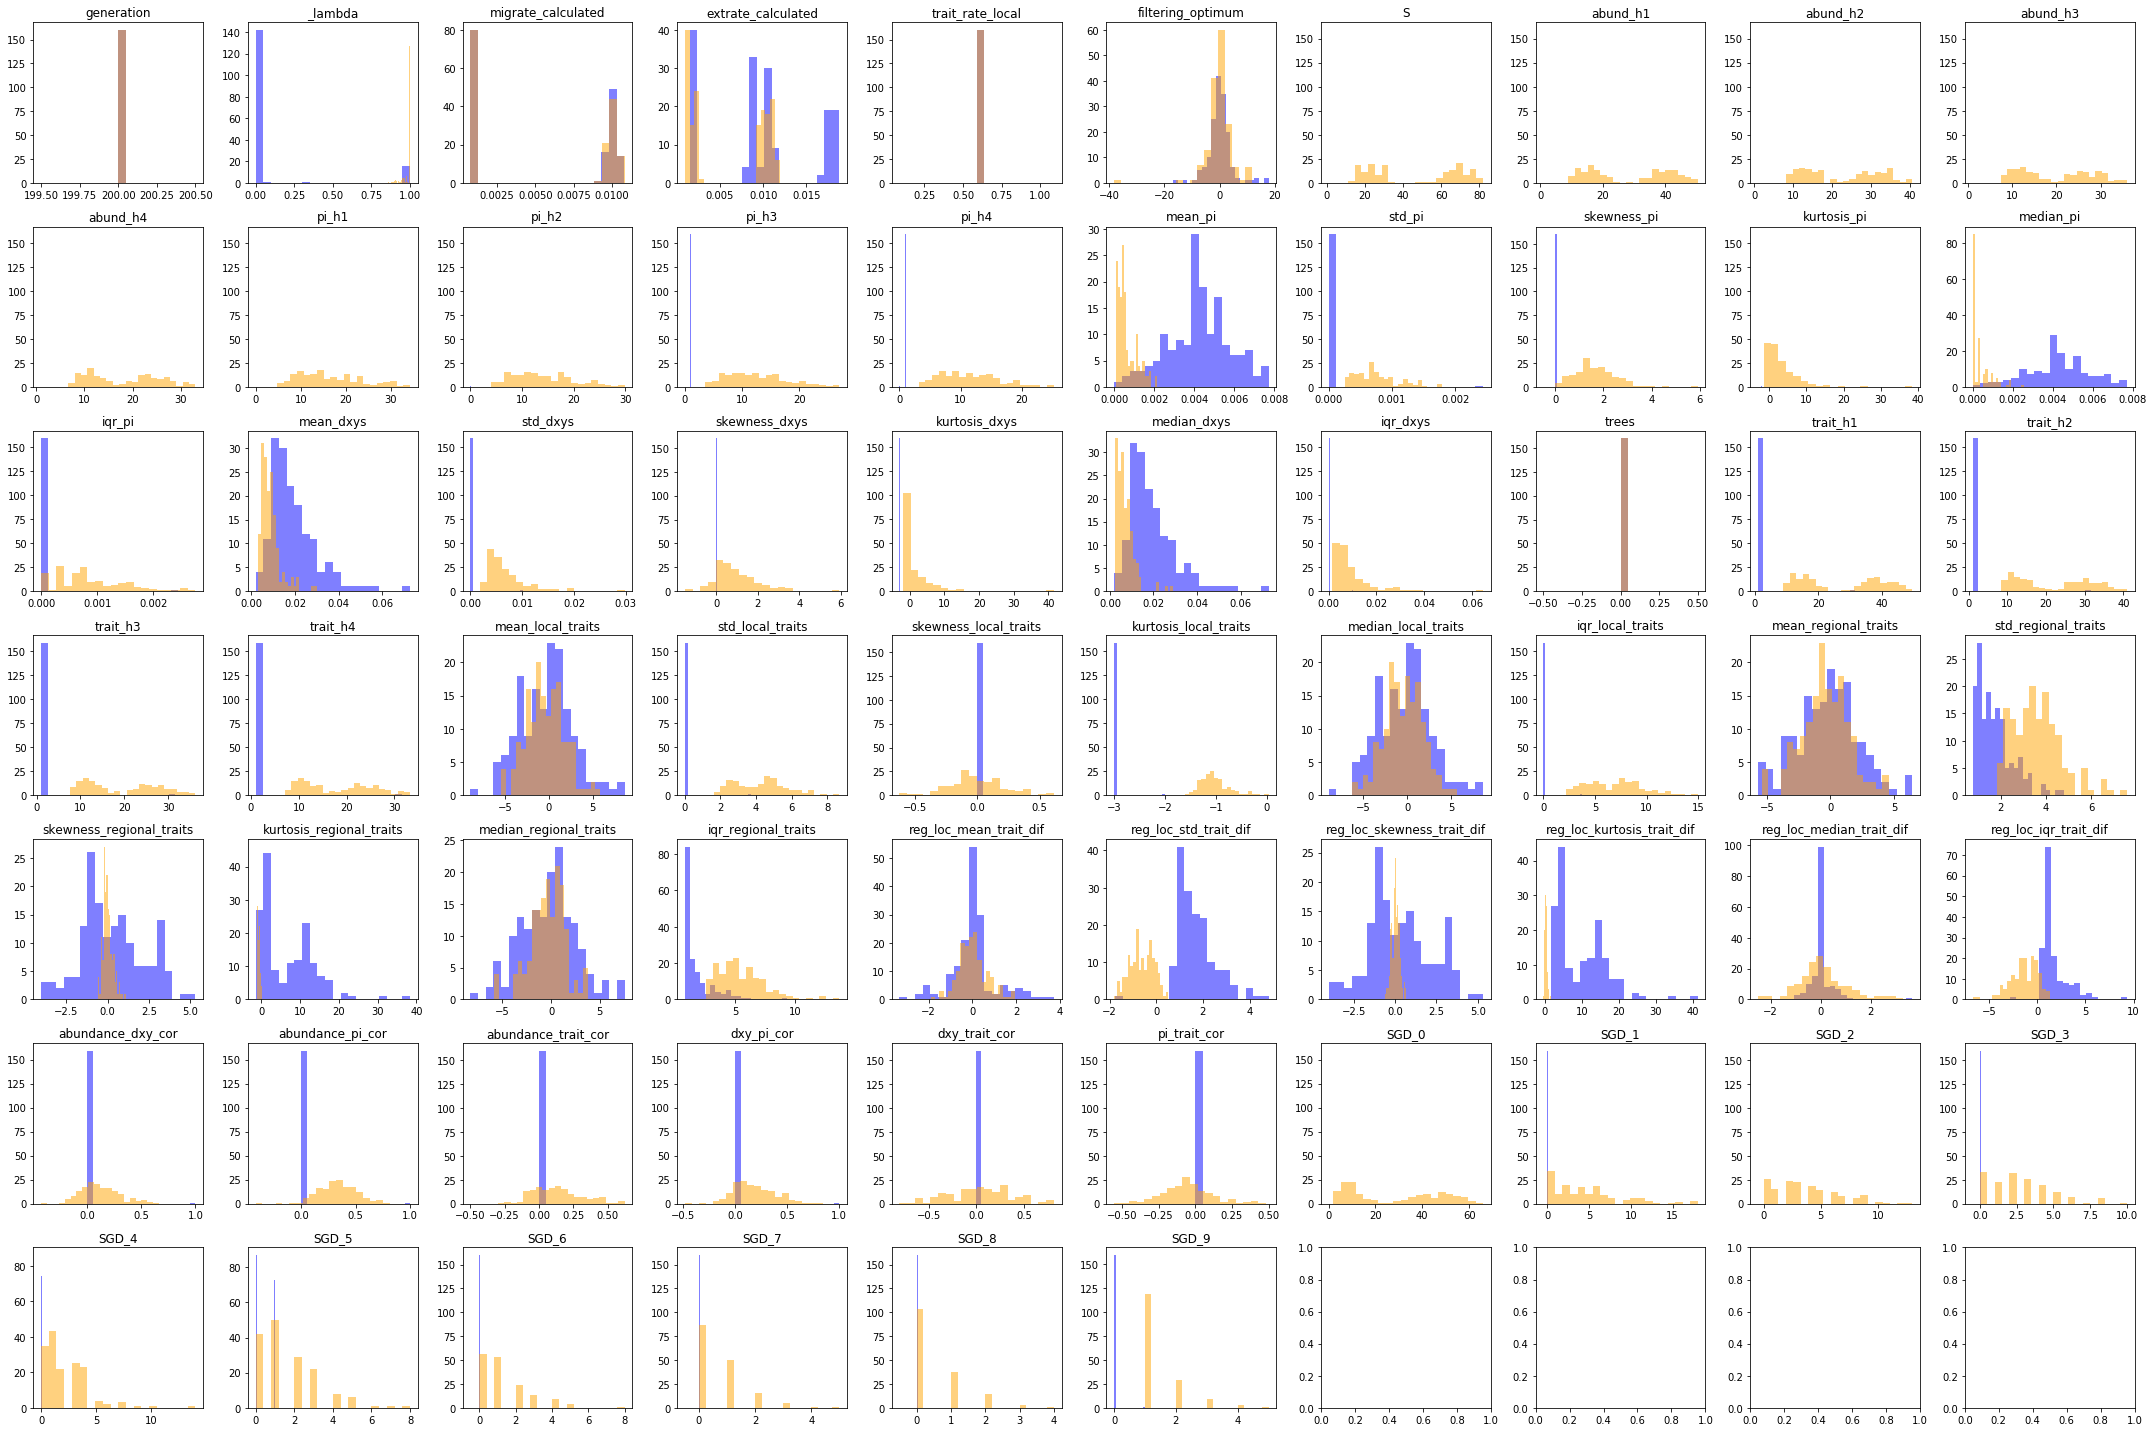

In [20]:
# Pairwise
# No array is blue
# continuous is orange
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(noarr_pw.columns)[15:], axs):
    ax.hist(noseed[p], color='blue', bins=20, alpha=0.5)
    ax.hist(nocont_pw[p], color='orange', bins=20, alpha=0.5)
    #ax.hist(matrix_mutualism_pw[p], color='green', bins=20, alpha=0.5)
    ax.set_title(p)
fig.tight_layout()

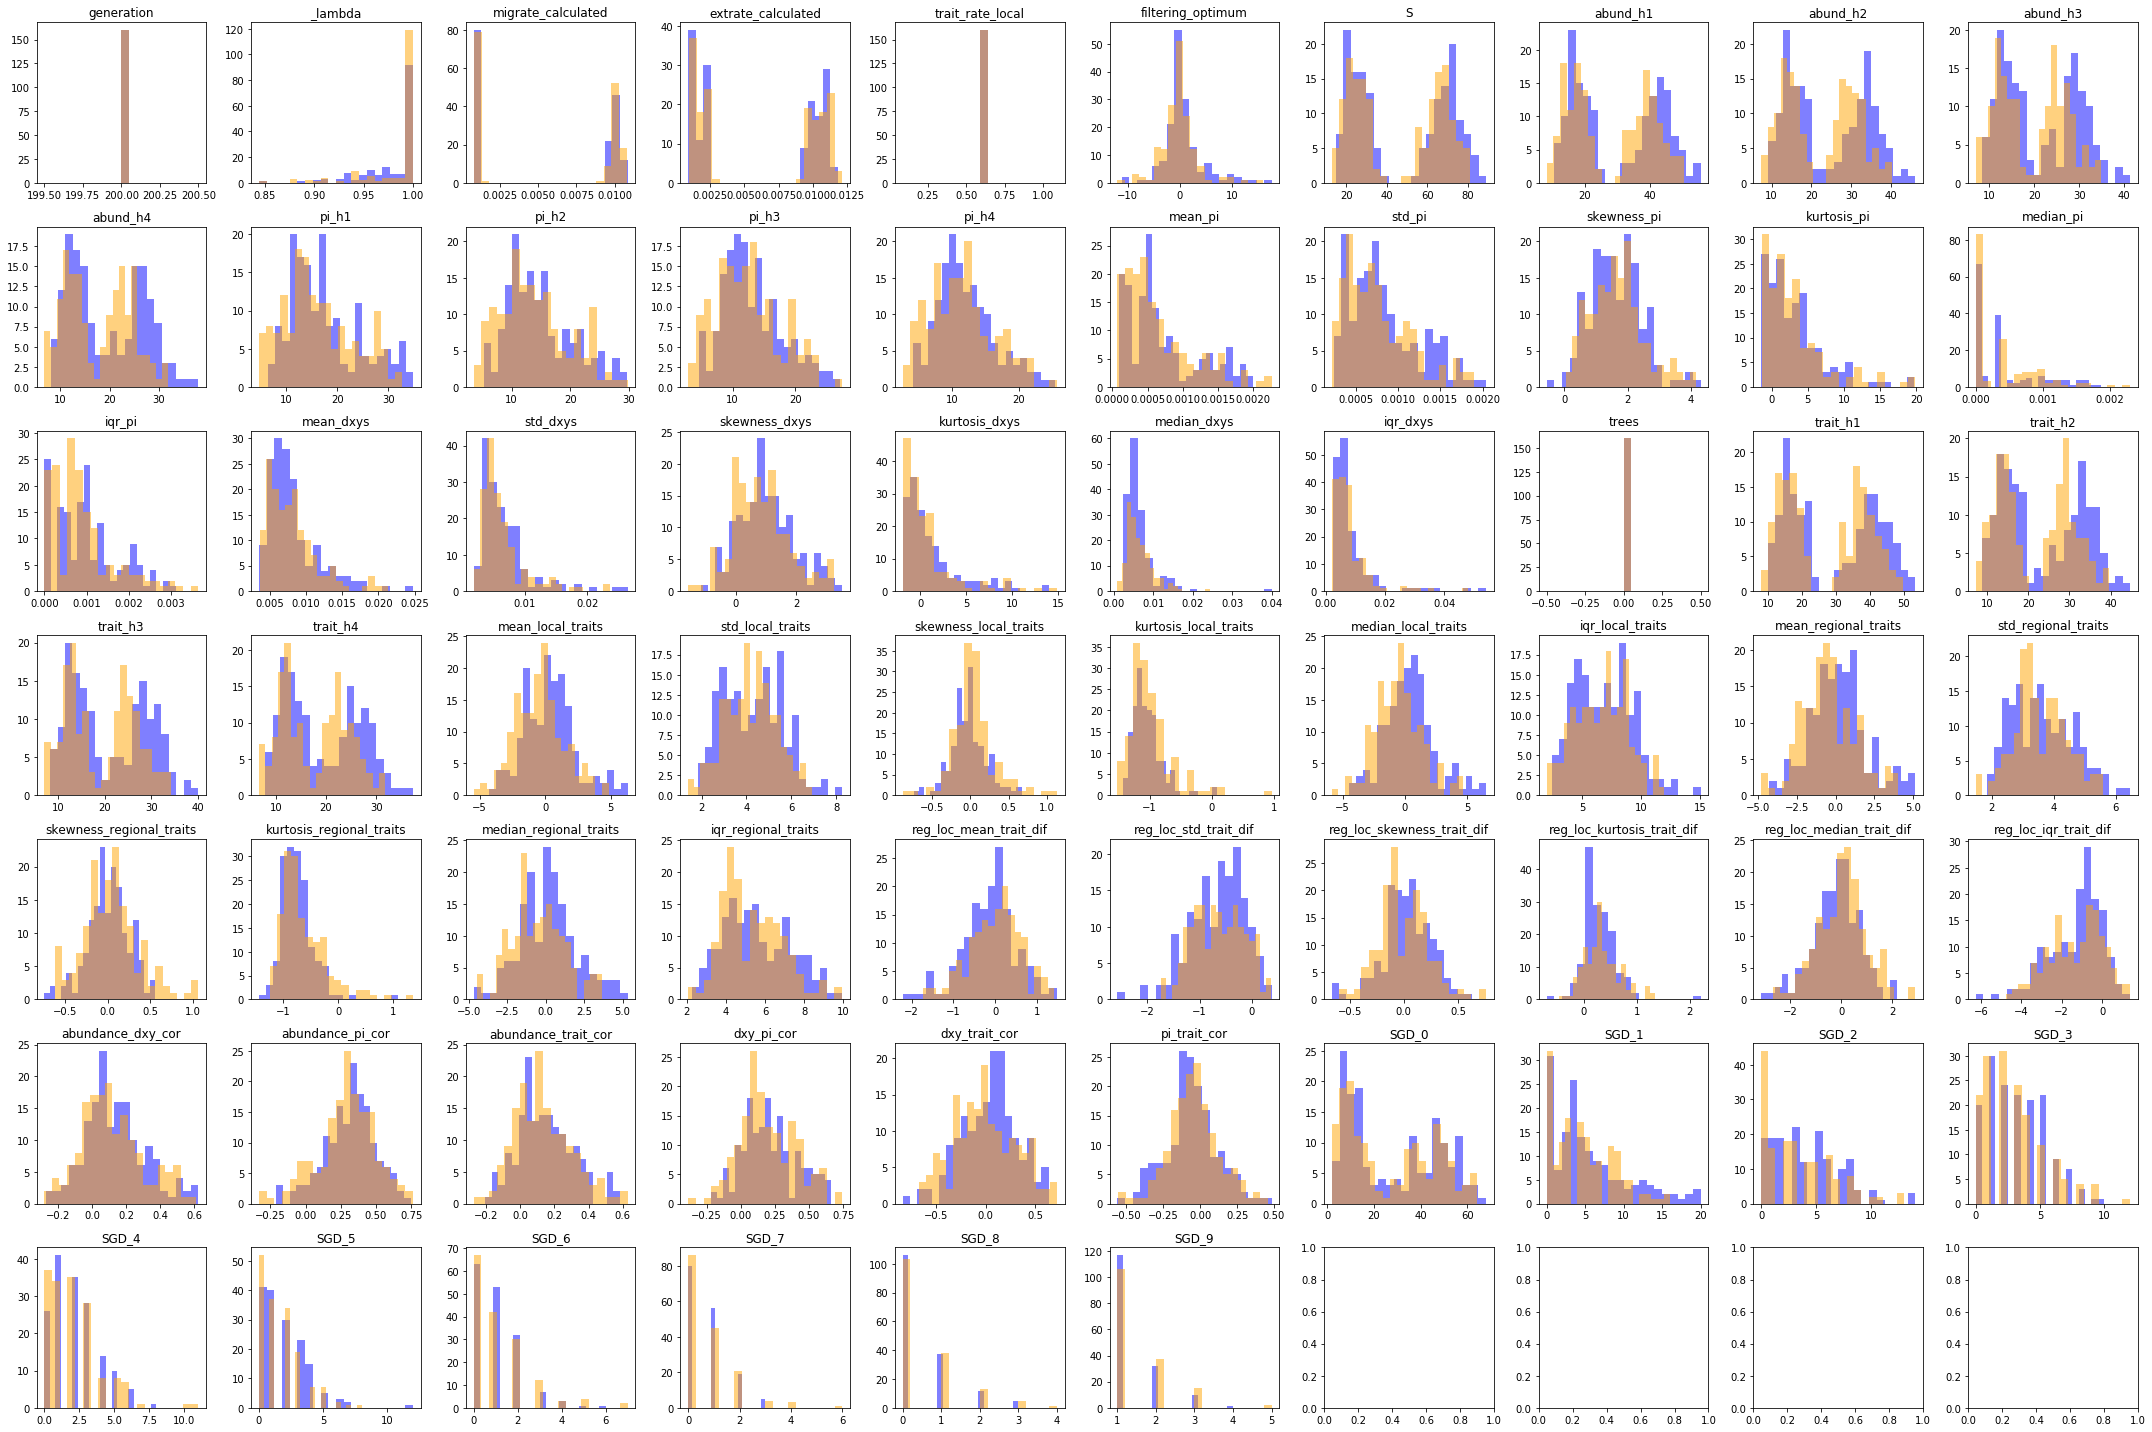

In [20]:
# Pairwise
# No array is blue
# continuous is orange
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(noarr_pw.columns)[15:], axs):
    ax.hist(noarr_pw[p], color='blue', bins=20, alpha=0.5)
    ax.hist(cont_pw[p], color='orange', bins=20, alpha=0.5)
    #ax.hist(matrix_mutualism_pw[p], color='green', bins=20, alpha=0.5)
    ax.set_title(p)
fig.tight_layout()

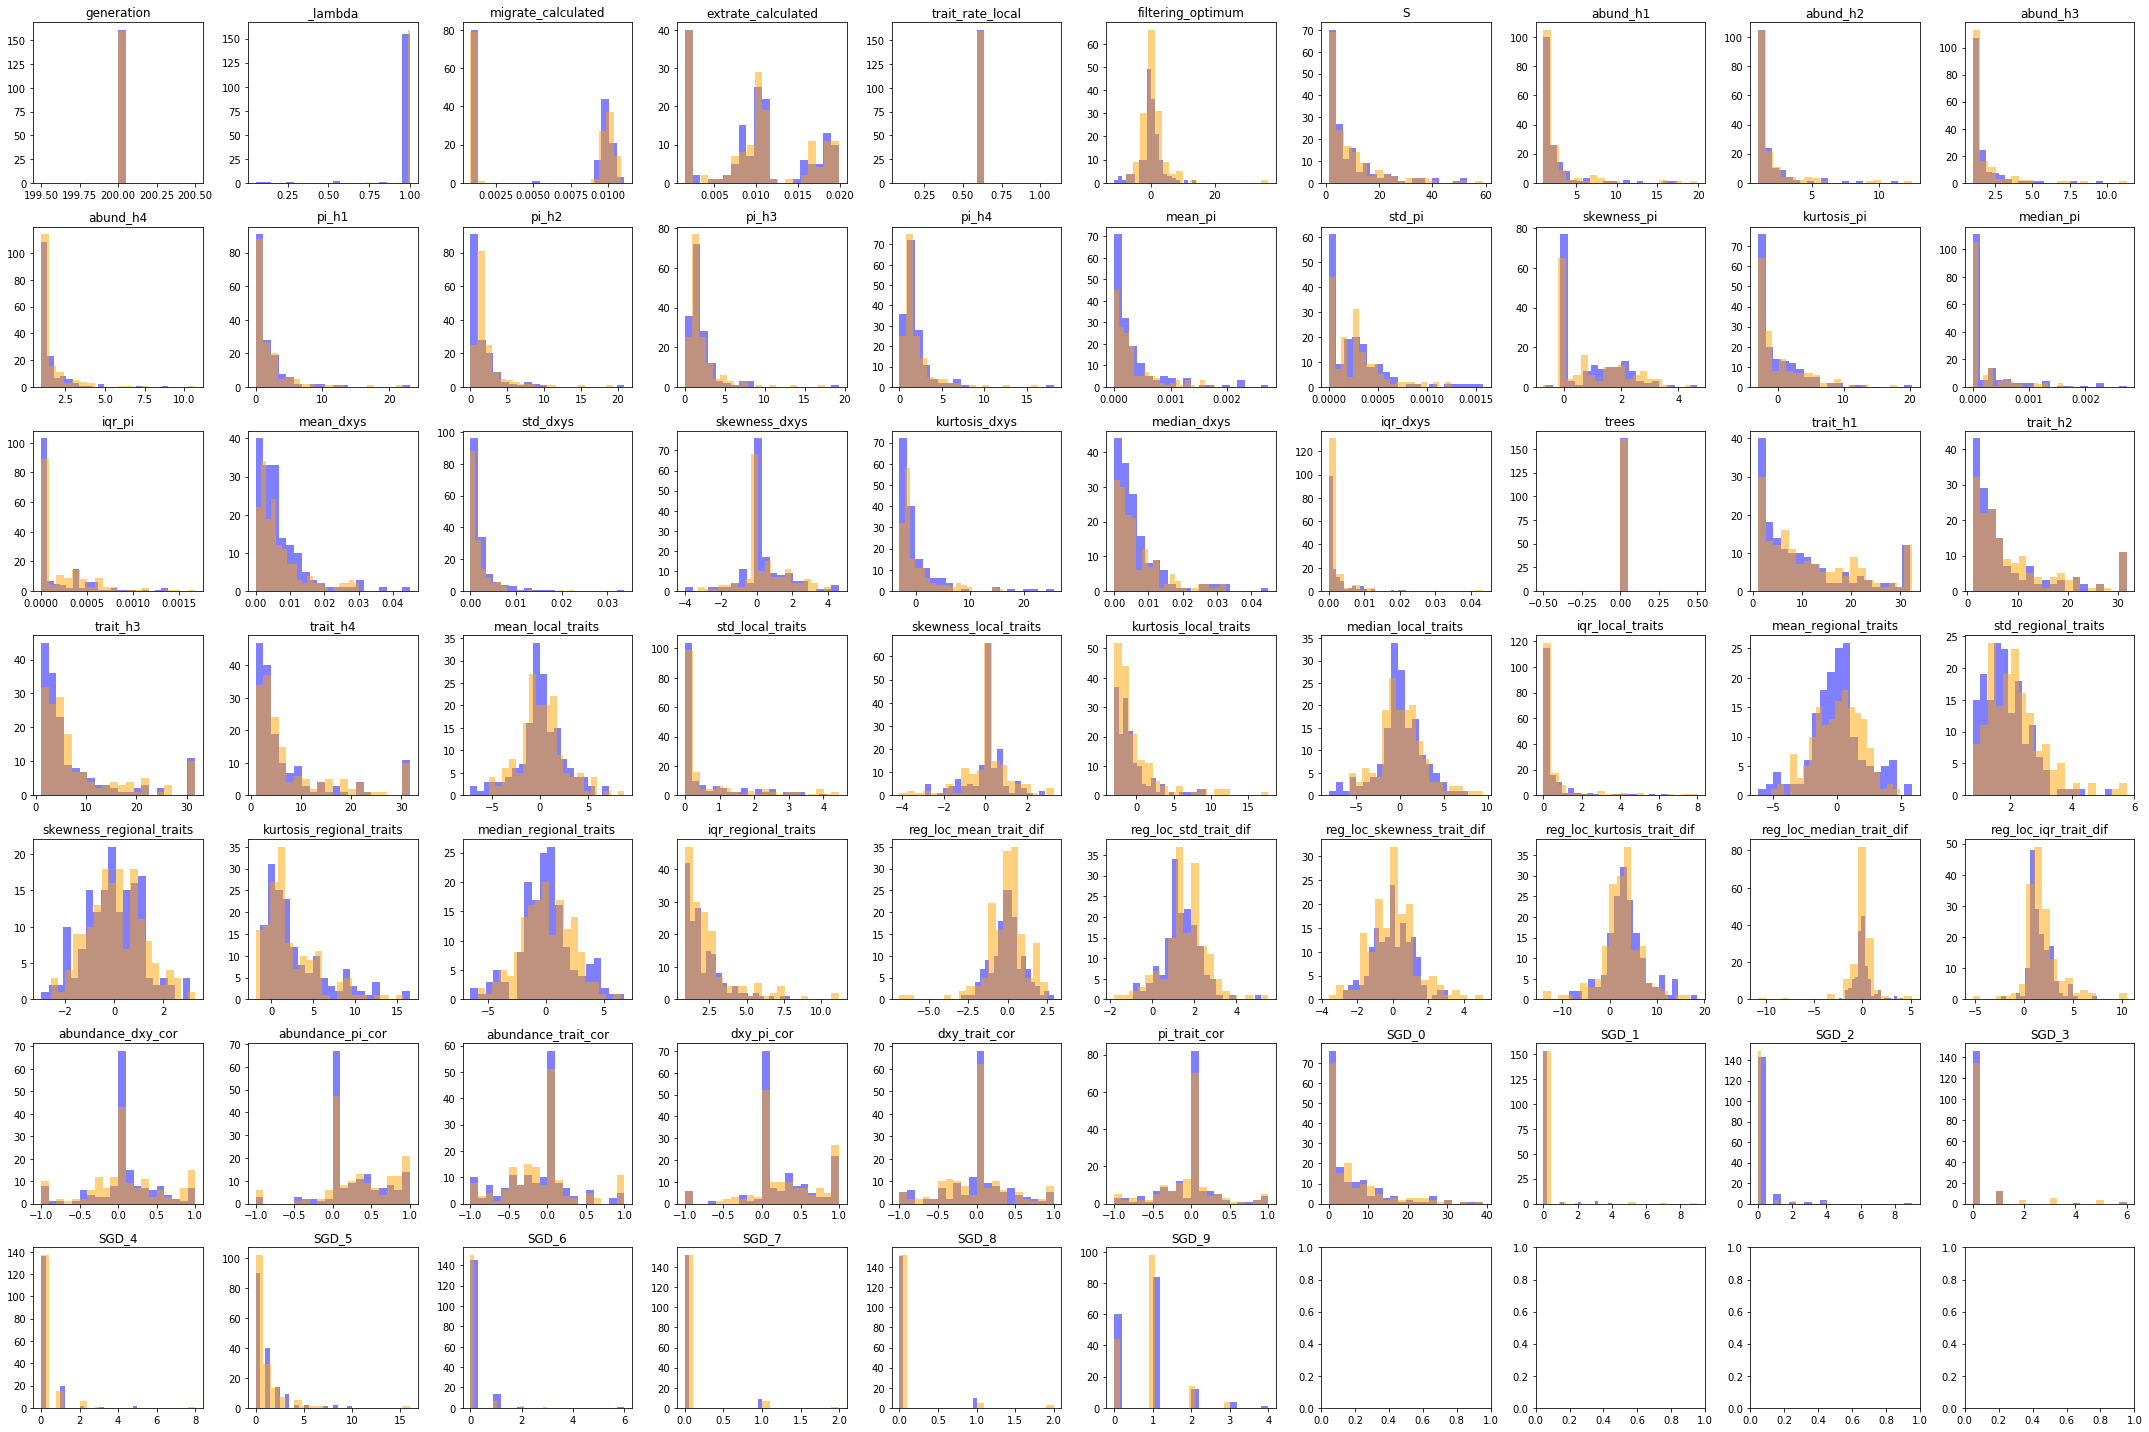

In [26]:
# Pairwise
# No array is blue
# continuous is orange
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(noarr_filt.columns)[15:], axs):
    ax.hist(noarr_filt[p][:161], color='blue', bins=20, alpha=0.5)
    ax.hist(cont_filt[p], color='orange', bins=20, alpha=0.5)
    #ax.hist(matrix_mutualism_pw[p], color='green', bins=20, alpha=0.5)
    ax.set_title(p)
fig.tight_layout()

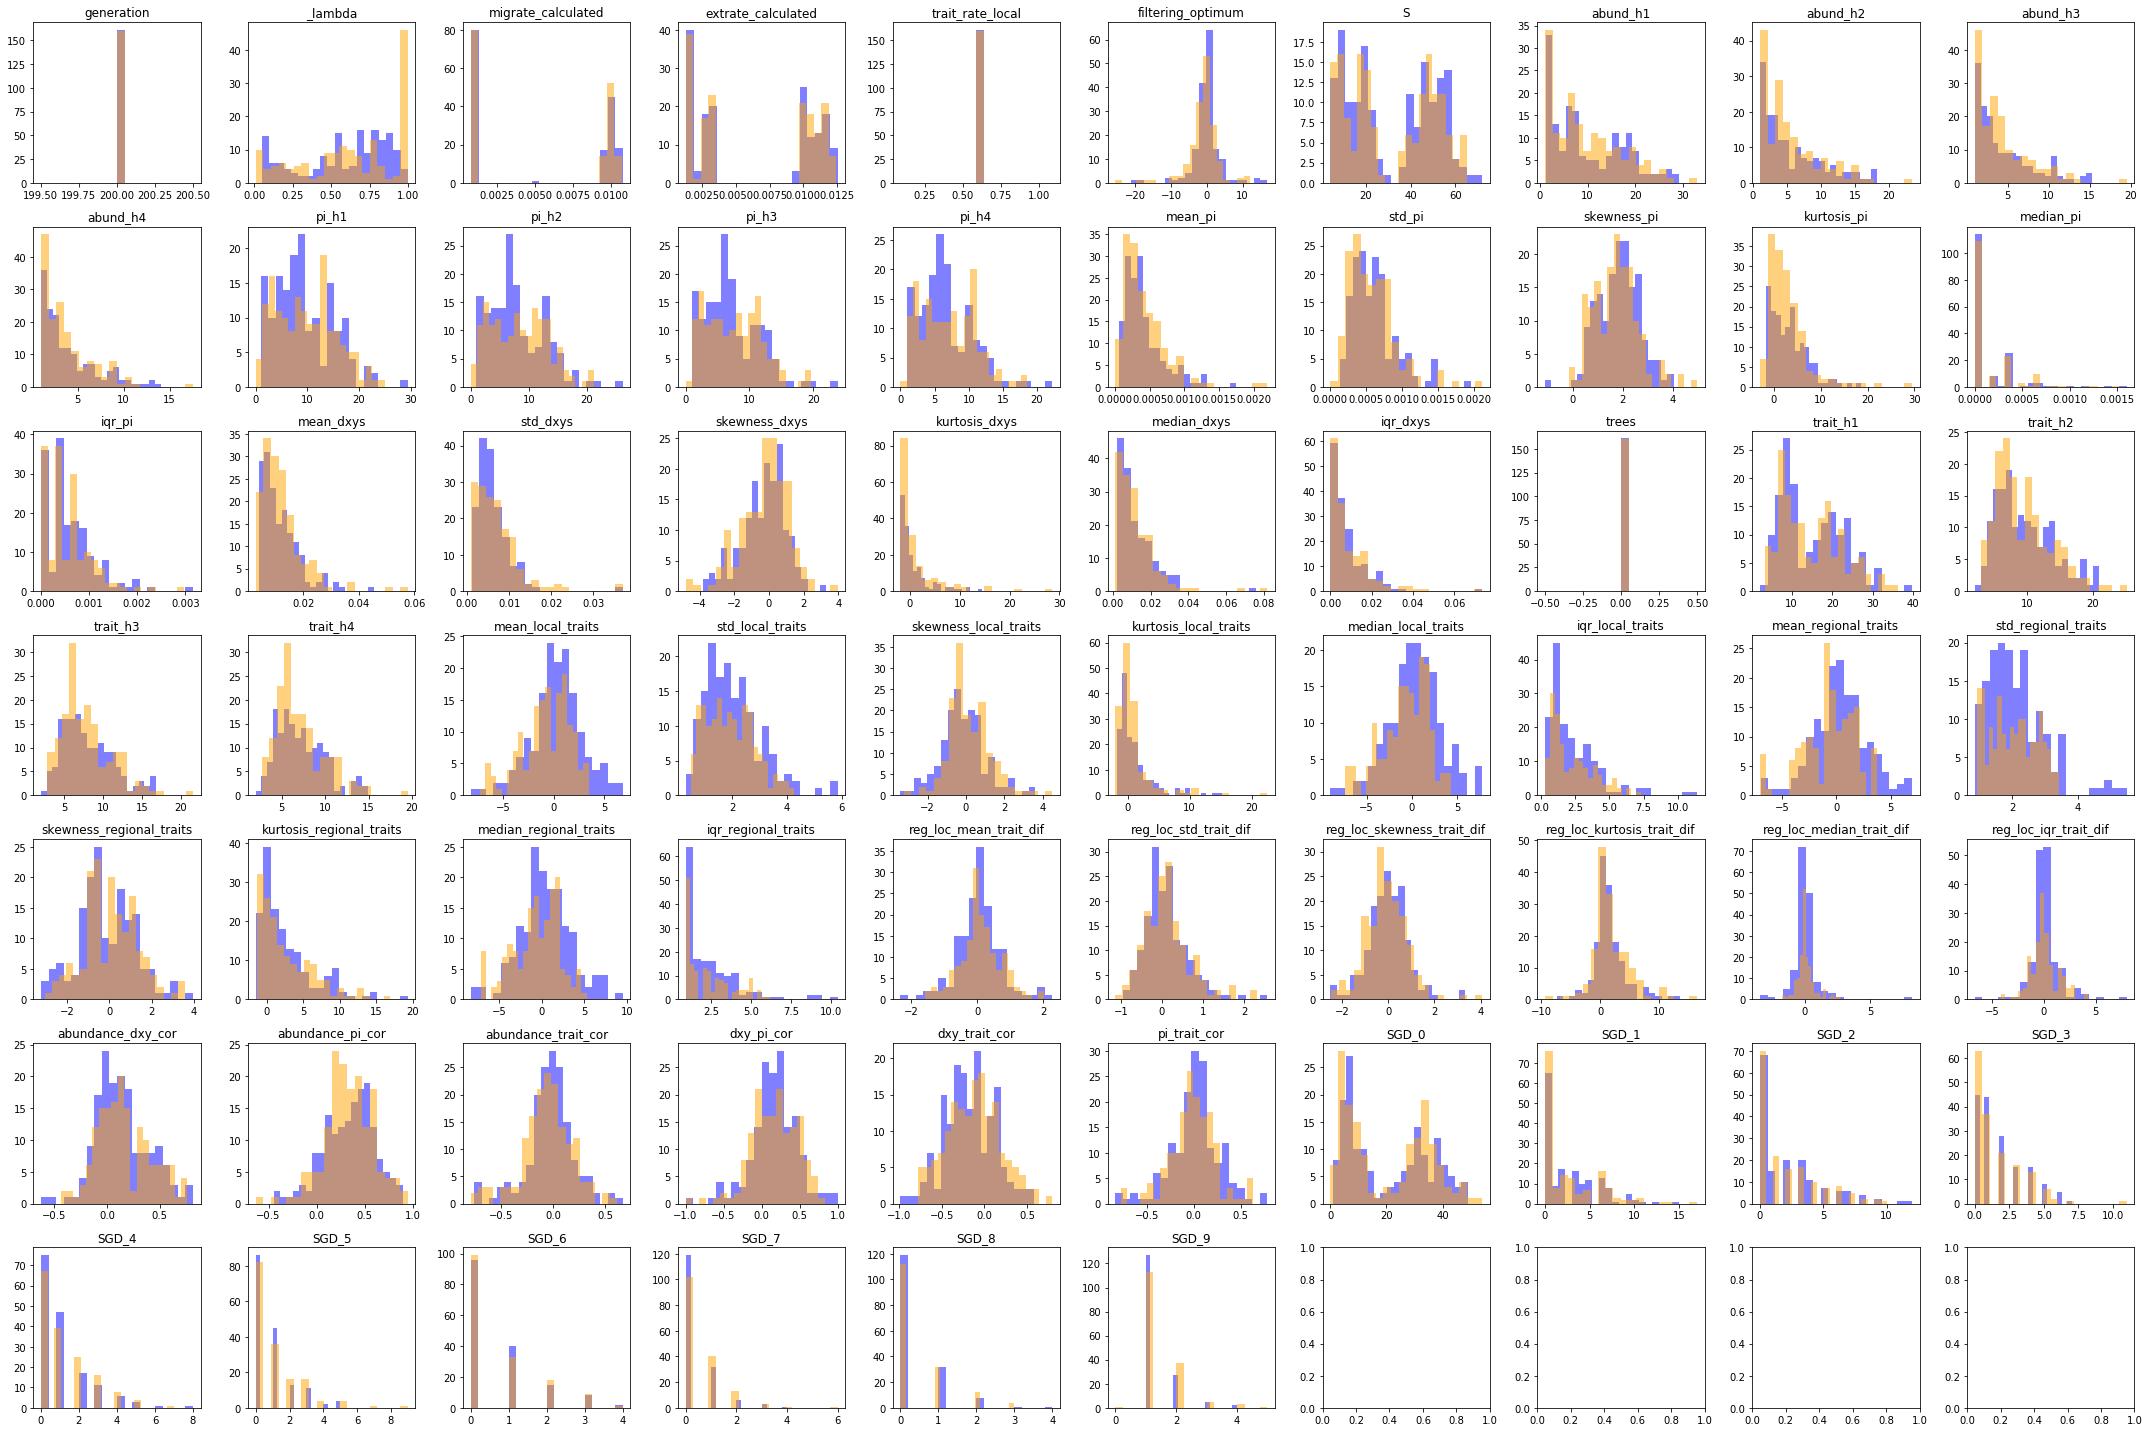

In [25]:
# Pairwise
# No array is blue
# continuous is orange
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(noarr_neutral.columns)[15:], axs):
    ax.hist(noarr_neutral[p][:161], color='blue', bins=20, alpha=0.5)
    ax.hist(cont_neutral[p], color='orange', bins=20, alpha=0.5)
    #ax.hist(matrix_mutualism_pw[p], color='green', bins=20, alpha=0.5)
    ax.set_title(p)
fig.tight_layout()

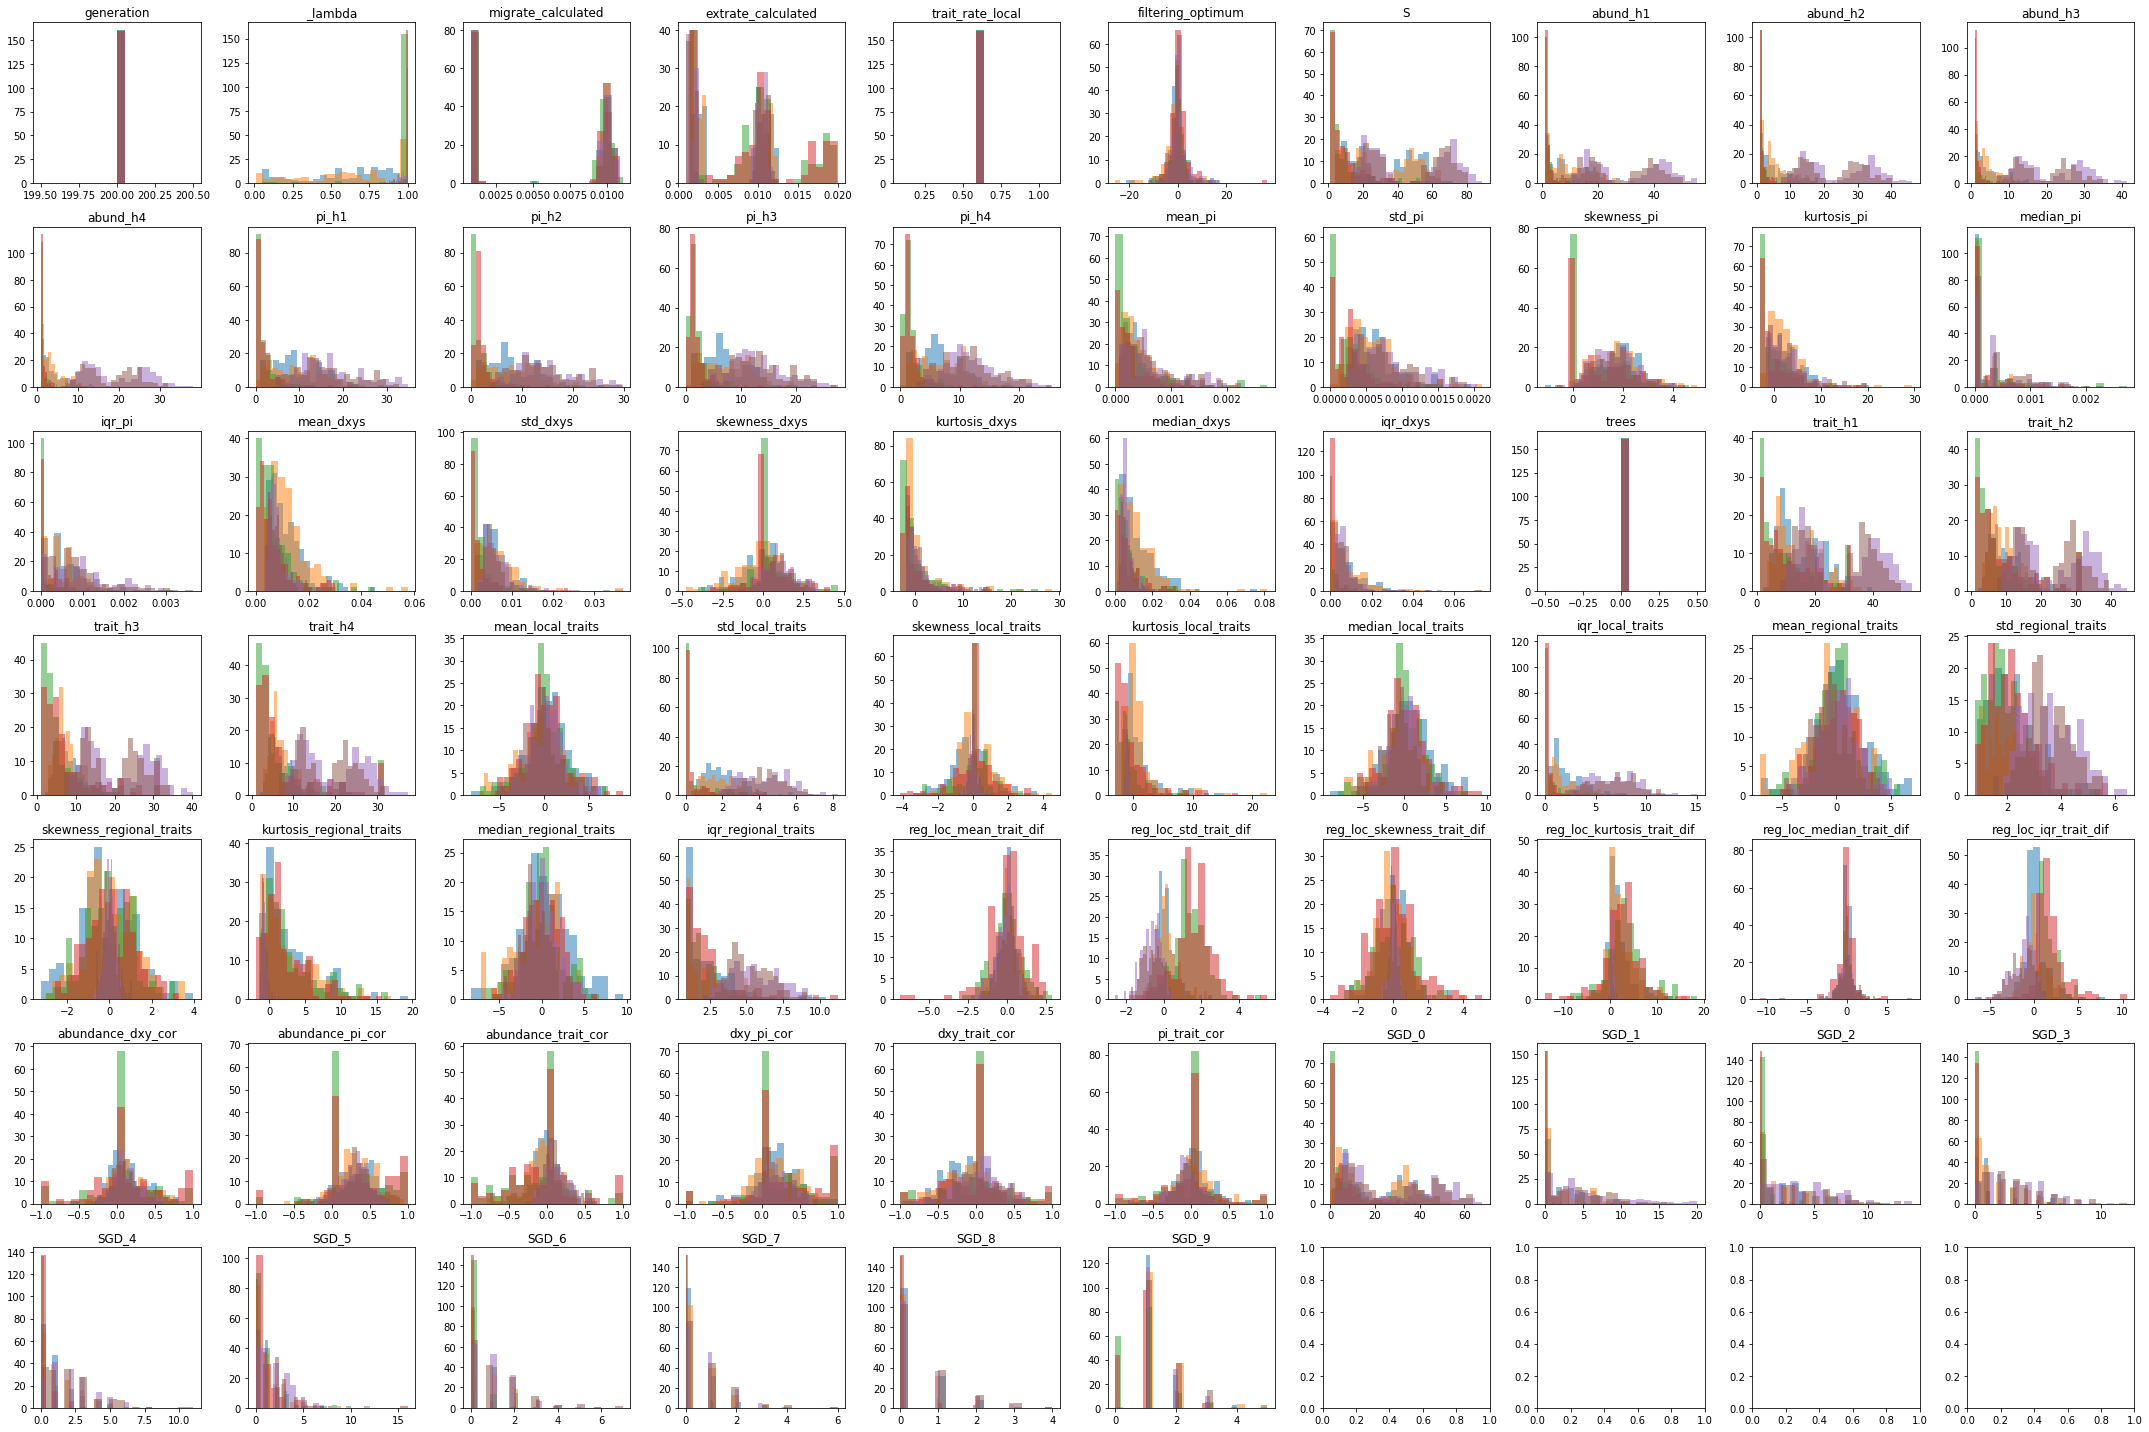

In [27]:
# Pairwise
# No array is blue
# continuous is orange
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(noarr_neutral.columns)[15:], axs):
    ax.hist(noarr_neutral[p][:161], bins=20, alpha=0.5)
    ax.hist(cont_neutral[p], bins=20, alpha=0.5)
    ax.hist(noarr_filt[p][:161], bins=20, alpha=0.5)
    ax.hist(cont_filt[p], bins=20, alpha=0.5)
    ax.hist(noarr_pw[p][:161], bins=20, alpha=0.5)
    ax.hist(cont_pw[p], bins=20, alpha=0.5)
    #ax.hist(matrix_mutualism_pw[p], color='green', bins=20, alpha=0.5)
    ax.set_title(p)
fig.tight_layout()